In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [10]:
file_path = "C:\\Users\\HP\\Documents\\ML\\Linear Regression\\Petal Prediction\\iris.csv"
data = pd.read_csv(file_path)
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [26]:
X = data[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']]
y = data['variety']

In [33]:
le = LabelEncoder()
le.fit(y)
y = le.fit_transform(y)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.23)

In [36]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [53]:
y_pred = model.predict(X_test)
score = r2_score(y_test, y_pred)
print(f"{score * 100}% accurate")

90.97938144329896% accurate


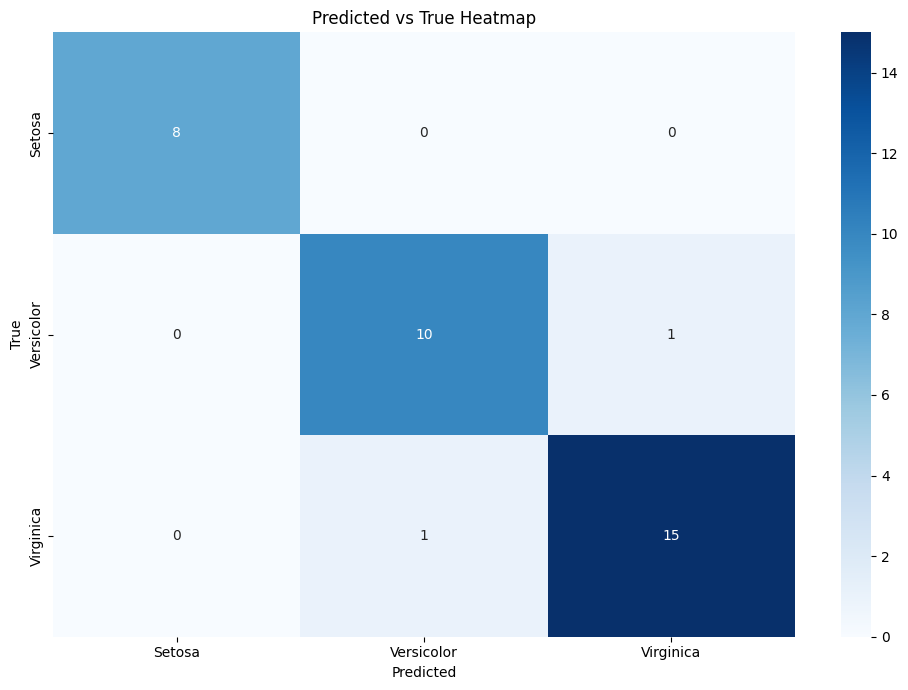

In [63]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
import seaborn as sn 
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Setosa', 'Versicolor', 'Virginica'],
            yticklabels=['Setosa', 'Versicolor', 'Virginica'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Predicted vs True Heatmap")
plt.tight_layout()

In [43]:
slength = float(input("Sepal Length: "))
swidth = float(input("Sepal Width: "))
plength = float(input("Petal Length: "))
pwidth = float(input("Petal Width: "))
test_data = {
    "sepal.length": [slength],
    "sepal.width": [swidth],
    "petal.length": [plength],
    "petal.width": [pwidth]
}
feature = pd.DataFrame(test_data)
raw_pred = model.predict(feature)
pred = le.inverse_transform(raw_pred)
print(f"The class is {pred[0]}")

Sepal Length:  5
Sepal Width:  3.3
Petal Length:  1.4
Petal Width:  0.2


The class is Setosa
